# [Cellpose](https://cellpose.readthedocs.io/en/latest)
see https://cellpose.readthedocs.io/en/latest/notebook.html
and https://cellpose.readthedocs.io/en/latest/outputs.html#plotting-functions

In [1]:
import sys, os; sys.path += [os.path.join(os.path.expanduser('~'), 'thesis')]  # NOTE hardcoded project root to find shared util modules

import numpy as np
import matplotlib.pyplot as plt
from cellpose import models
from cellpose.io import imread


dataset_id = 'third'
imgids = [1,2,3,4]
model_type = 'cyto'

In [2]:

cache_dir = os.path.join(os.path.expanduser('~'), '.cache', 'thesis', 'cellpose', dataset_id)
os.makedirs(os.path.join(cache_dir, 'masks'), exist_ok=True)


model = models.Cellpose(model_type=model_type, gpu=True, net_avg=True)
images = [imread(f'../data/third/{i}.jpg') for i in imgids]

masks, _flows, _styles, diams = model.eval(images, diameter=None, channels=[[0,0]])  # automatic diameter detection works often well

for imgid, mask in zip(imgids, masks):
  pMasks = f"{cache_dir}/masks/{imgid}-{model_type}.npy"
  np.save(pMasks, mask)

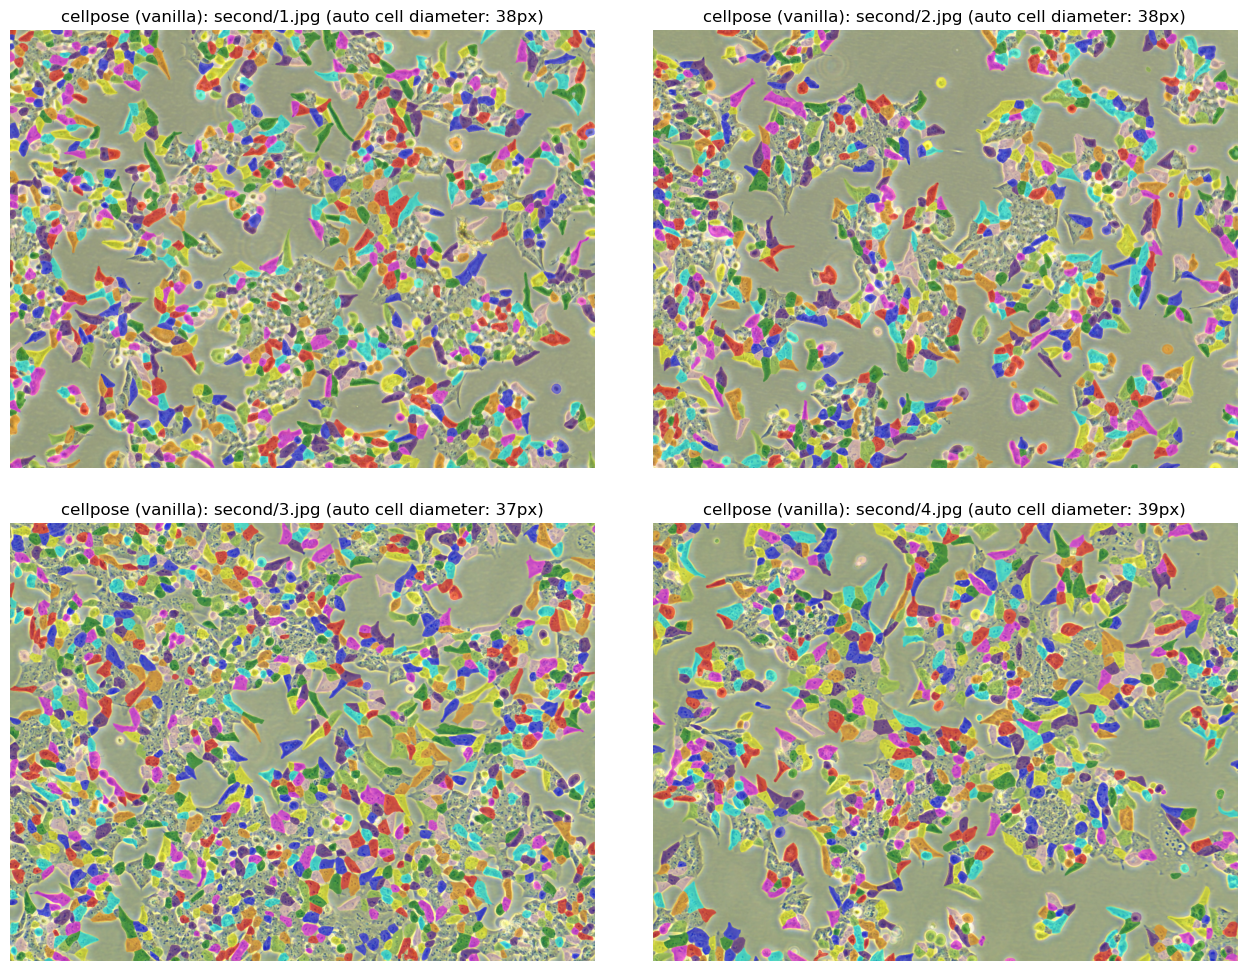

In [3]:
import skimage

fig, axes = plt.subplots(2, 2, figsize=(13, 10))
plt.tight_layout()

for img, ax, mask, d, i in zip(images, axes.flat, masks, diams, range(1,99)):
  ax.axis('off');
  ax.imshow(skimage.color.label2rgb(mask, img, bg_color=None, alpha=0.5, saturation=1))
  ax.set_title(f'cellpose (vanilla): second/{i}.jpg (auto cell diameter: {d:.0f}px)')